## MAKİNE ÖĞRENMESİNE GİRİŞ

### DOĞRUSAL REGRESYON MODELİ- RIDGE REGRESYON MODELİ

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn import model_selection

In [4]:
df=pd.read_csv("/Users/bernaersari/Downloads/Hitters.csv")

In [5]:
df # beyzbol oyuncularının çeşitli özeLliklerine göre ücretini belirleyen bir model kurmak istiyoruz.

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [6]:
df.shape

(322, 20)

In [8]:
df=df.dropna() #boş değerleri silelim.

In [9]:
df.select_dtypes(include='object').columns #kategorik değişkenleri bulalım.

Index(['League', 'Division', 'NewLeague'], dtype='object')

In [10]:
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']]) 
# one-hot encoding ile kategorik değişkenleri 0-1 değişkenlere dönüştürelim.

In [11]:
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [12]:
y=df['Salary'] #bulmak istediğimiz hedef değişkenimiz olan 'Salary' bağımlı değişkenimizi y olarak tanımlayalım.

In [13]:
X_=df.drop(['Salary','League', 'Division', 'NewLeague'], axis=1) 
#dataframeden encoding yapılan değişkenleri ve bağımlı değişkeni silip dataframedeki verileri X_ olarak tanımlayalım.

In [14]:
X_ #bağımsız değişkenler

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


In [15]:
X=pd.concat([X_,dms[['League_N', 'Division_W','NewLeague_N']]],axis=1) 
#son olarak tüm bağımsız değişkenleri bir araya getirelim. 
#Dummy değişkenler aynı bilgileri içerdiğinden her birinden bir tane değişkeni bağımsız değişken grubuna ekliyoruz.

In [16]:
X #tüm bağımsız değişkenler bir araya getirildi.

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,0,0,0


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.25,
                                               random_state=42) # veri setinin yüzde 25 test seti olarak ayrıldı.

In [18]:
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train)
#ridge regresyon modeli oluşturup,modeli eğitelim. 
#Alpha değeri ise, ridge regresyon modelinin matematiksel gösterimdeki karşılığı lambdadır.

In [19]:
ridge_model

Ridge(alpha=0.1)

In [20]:
ridge_model.coef_ #alpha=0.1 yani lambda=0.1 olduğunda makinenin tahmin yaparken kullanacağı katsayılara bakalım.

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [21]:
#alpha sayısı değiştikçe katsayılar(ridge regresyon formülündeki beta değerleri) da değişecektir.
#hızlıca farklı alpha değerleri farklı katsayılar üretiyor. Bir dataframede bu değerleri görelim.

In [22]:
ridge_model_01=Ridge(alpha=0.1).fit(X_train,y_train)

In [23]:
ridge_model_01_df=pd.DataFrame(ridge_model_01.coef_)

In [24]:
ridge_model_5=Ridge(alpha=5).fit(X_train,y_train)

In [25]:
ridge_model_5_df=pd.DataFrame(ridge_model_5.coef_)

In [26]:
alpha_values_coefs=pd.concat([ridge_model_01_df,ridge_model_5_df],axis=1)

In [27]:
alpha_values_coefs.columns= ['temp_1', 'temp_2'] 
#dataframeleri birleştirince kolon isimlerinin her ikisi 0 oldu.
#Kolon isimlerine geçici isim verelim. Sonrasında da alpha değerleri ile isimlerini değiştirelim.

In [28]:
alpha_values_coefs.rename(columns={'temp_1':'alpha=0.1',
                                   'temp_2':'alpha=5'})

,alpha=0.1,alpha=5
0,-1.774357,-1.810404
1,8.802405,8.878728
2,7.295956,7.124870
3,-3.332576,-3.317135
4,-2.083165,-2.011622
5,5.425313,5.406915
6,7.585149,7.258284
7,-0.137528,-0.130334
8,-0.207797,-0.254259
9,-0.603611,-0.711093


In [29]:
#Bazı değişkenlerde alpha sayısının 0.1 olması ile 5 olması arasında ciddi farklar olduğu görülüyor.
#Birçok değişken için ise yakın sayılar mevcut.

In [30]:
ridge_model_01.intercept_ # alpha=0.1 olduğunda sabit katsayısı, -4.57 oluyor.

-4.578626905723695

In [31]:
ridge_model_5.intercept_ # alpha=5 olarak girildiğinde ise sabit katsayı -3.42 olarak belirleniyor.

-3.425196868716398

In [32]:
#daha fazla değişik alpha sayısıyla katsayılardaki değişimleri for döngüsü ile gözlemleyelim.

In [33]:
#100 adet rastgele sayı üretelim.

In [34]:
np.linspace(10,-2,100) #yazılan linspace fonksiyonu ile, -2 ile 10 sayıları arasında aralarında aynı fark sayısı olan 
#100 adet sayı üretir .
#Örneğin, aşağıda üretilen sayılar arasında her bir sayı arasındaki fark, 0.12121212 dir.

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [35]:
lambda_numbers=np.sqrt(10**np.linspace(10,-2,100)) # rastgele 100 adet alpha/lambda sayısı üretilsin istiyoruz.

In [36]:
coefs=[] #for döngüsü ile oluşturulan katsayıların ekleneceği bir liste oluşturalım.
intercepts=[] #for döngüsü ile oluşturulan sabit katsayılar için de bir liste oluşturalım.
ridgemodel=Ridge() #bir ridge regresyon modeli yaratalım.

In [37]:
for i in lambda_numbers: #lambda_numbers'ın içinde gezin ve buradaki her sayısı i değişkenine ata.
    ridgemodel.set_params(alpha=i)# oluşturulan ridge modelin alpha değerine bu i değişkenindeki sayıyı ata.
    ridgemodel.fit(X_train,y_train) # bu alpha değeri ile oluşturulan ridge modeli eğit.
    coefs.append(ridgemodel.coef_) #bu lambda sayısı ile oluşan modelin katsayılarını coefs listesine ata.
    intercepts.append(ridgemodel.intercept_)

In [38]:
coefs # 100 tane, her bir bağımsız değişken için oluşan katsayılar. Bu örnek için değişken sayımız 19 adetti.
#Her bir arrayde bu 19 değişken için kullanılacak katsayılar bulunuyor.

[array([ 0.1689341 ,  1.31859997,  0.07829197,  0.52670146,  0.25867905,
         0.86336433,  0.04768233, -0.2640203 ,  0.6244505 , -0.08690317,
         0.75299733,  0.4989042 ,  0.0475849 ,  0.27716804,  0.15663533,
        -0.1501636 ,  0.0279269 , -0.05258265,  0.01669309]),
 array([ 0.11335949,  1.45189394,  0.0819644 ,  0.55891619,  0.26990306,
         0.95379095,  0.05565488, -0.26461104,  0.61656181, -0.10566659,
         0.77565946,  0.50999362,  0.03334576,  0.27667674,  0.16245402,
        -0.16856572,  0.03234144, -0.06009139,  0.01939204]),
 array([ 0.05324311,  1.59792273,  0.08573623,  0.59030127,  0.28093868,
         1.05160386,  0.0646111 , -0.26422426,  0.60549302, -0.12519561,
         0.79896472,  0.52092547,  0.01785184,  0.2762833 ,  0.16825894,
        -0.18863376,  0.0374414 , -0.06866503,  0.02252836]),
 array([-1.13359947e-02,  1.75714240e+00,  8.96249068e-02,  6.19879382e-01,
         2.91590089e-01,  1.15680372e+00,  7.46423509e-02, -2.62907745e-01,
     

Text(0, 0.5, 'Katsayılar ve Kesim Noktaları')

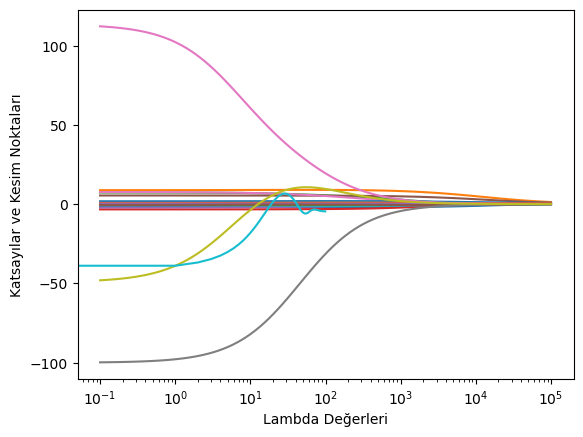

In [39]:
ax=plt.gca() # plt modülünü ve bu modülün gca() fonksiyonunu kullanarak mevcut figürün veya
#alt grafiğin (axes) referansını alır. ax değişkeni üzerinden bu grafiğe erişebiliriz.
ax.plot(lambda_numbers,coefs,intercepts)  
#Bu fonksiyon ile lambda değerlerine bağlı olarak katsayıları ve interceptleri çizgi grafik olarak gösterir.
ax.set_xscale('log') #x ekseni logaritmik ölçekte ayarlanır. Bu, lambda değerlerinin çok geniş bir aralığa yayılabileceği durumlarda,
#grafik üzerinde daha iyi bir gösterim sağlamak için kullanılır.
ax.set_xlabel('Lambda Değerleri')
ax.set_ylabel('Katsayılar ve Kesim Noktaları')

In [40]:
ridge_model_01 #kurduğumuz model üzerinden tahmin yapmalım.

Ridge(alpha=0.1)

In [41]:
y_pred_train=ridge_model_01.predict(X_train) #eğitim setinin bağımsız değişkenleri üzerinden eğitim setinin bağımlı değişkenlerini tahmin edelim.

In [42]:
y_pred_train[0:20] #Eğitim setinin, tahmin edilen ilk 20 değere bakalım.

array([ 377.32722972,  802.33593374,  495.66497455,  112.55723373,
        426.36377192, 1004.17111652,  154.60488574,  362.44112621,
        485.16325501,  918.52163204, 1621.10775334,  818.04761824,
        920.88184597,  739.20423491,  645.71641635,  706.93566474,
       1139.9491843 ,   40.91367448,  213.27383013,  406.89150389])

In [43]:
y_pred_test=ridge_model_01.predict(X_test)

In [44]:
y_pred_test[0:20] #Test setinin, tahmin edilen ilk 20 değerine bakalım.

array([ 611.91293736,  695.30187895, 1013.49571186,  409.96645806,
        416.01757052,  342.89676643,  660.87829213,  446.76474791,
        912.30240153,  645.2322323 ,  686.20090114,  888.09356816,
        224.83960652,  442.95776066,  265.94144802,  506.98174825,
        804.98579688,   42.95964904, 1236.58319464,  317.62261973])

In [ ]:
#Hem eğitim hem de test setlerinin kurduğumuz model tarafından tahmin edilirken yapılan hata değerlerini hesaplayalım.


In [45]:
#Cross validation yapmadan önceki eğitim seti hata değeri
RMSE_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
RMSE_train

289.3294761170452

In [46]:
#cross validation yaptıktan sonraki eğitim seti hata değerine bakalım.
RMSE_train_cv=np.sqrt(np.mean(-cross_val_score(ridge_model_01,X_train,y_train,cv=10,scoring='neg_mean_squared_error')))
RMSE_train_cv

351.77357841284675

In [47]:
#Cross validation yapmadan önceki test seti hata değeri
RMSE_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
RMSE_test

357.0239252607659

In [48]:
#cross validation yaptıktan sonraki test seti hata değerine bakalım.
RMSE_test_cv=np.sqrt(np.mean(-cross_val_score(ridge_model_01,X_test,y_test,cv=10,scoring='neg_mean_squared_error')))
RMSE_test_cv

480.0254933420229

### MODEL TUNING

In [73]:
lambda_numbers #hatırlayalım yukarıda 100 adet lambda değeri üretilsin istemiştik.

array([1.00000000e+05, 8.69749003e+04, 7.56463328e+04, 6.57933225e+04,
       5.72236766e+04, 4.97702356e+04, 4.32876128e+04, 3.76493581e+04,
       3.27454916e+04, 2.84803587e+04, 2.47707636e+04, 2.15443469e+04,
       1.87381742e+04, 1.62975083e+04, 1.41747416e+04, 1.23284674e+04,
       1.07226722e+04, 9.32603347e+03, 8.11130831e+03, 7.05480231e+03,
       6.13590727e+03, 5.33669923e+03, 4.64158883e+03, 4.03701726e+03,
       3.51119173e+03, 3.05385551e+03, 2.65608778e+03, 2.31012970e+03,
       2.00923300e+03, 1.74752840e+03, 1.51991108e+03, 1.32194115e+03,
       1.14975700e+03, 1.00000000e+03, 8.69749003e+02, 7.56463328e+02,
       6.57933225e+02, 5.72236766e+02, 4.97702356e+02, 4.32876128e+02,
       3.76493581e+02, 3.27454916e+02, 2.84803587e+02, 2.47707636e+02,
       2.15443469e+02, 1.87381742e+02, 1.62975083e+02, 1.41747416e+02,
       1.23284674e+02, 1.07226722e+02, 9.32603347e+01, 8.11130831e+01,
       7.05480231e+01, 6.13590727e+01, 5.33669923e+01, 4.64158883e+01,
      

In [102]:
lambdas=np.random.randint(1,1000,100) #yukarıda da farklı lambda sayıları üretmiştik. Şimdi farklı sayılar üretelim.
lambdas

array([665, 731, 349, 518, 638, 601, 393, 980, 276, 331, 187, 182, 981,
       344, 171, 538, 859, 775, 718, 939, 947, 641, 909, 444, 524,  95,
       163, 579, 476, 135, 583, 417, 476, 909, 568, 590, 574, 662, 415,
       297,  60, 726, 368, 289, 799, 882, 134, 949, 720, 200, 747, 824,
       465, 630,  14, 365,  76, 425, 392, 120, 232, 886, 183, 696, 664,
       231, 934, 982, 541, 135, 894, 117, 997, 199,  96, 333, 387, 464,
       961, 878, 591, 753,  67, 767, 456, 427, 387, 397, 545, 380, 777,
        29, 882, 272, 173, 528, 739, 705, 713, 792])

In [103]:
Ridge_model_cv=RidgeCV(alphas=lambdas,cv=10,scoring="neg_mean_squared_error")

In [104]:
Ridge_model_cv.fit(X_train,y_train)

RidgeCV(alphas=array([665, 731, 349, 518, 638, 601, 393, 980, 276, 331, 187, 182, 981,
       344, 171, 538, 859, 775, 718, 939, 947, 641, 909, 444, 524,  95,
       163, 579, 476, 135, 583, 417, 476, 909, 568, 590, 574, 662, 415,
       297,  60, 726, 368, 289, 799, 882, 134, 949, 720, 200, 747, 824,
       465, 630,  14, 365,  76, 425, 392, 120, 232, 886, 183, 696, 664,
       231, 934, 982, 541, 135, 894, 117, 997, 199,  96, 333, 387, 464,
       961, 878, 591, 753,  67, 767, 456, 427, 387, 397, 545, 380, 777,
        29, 882, 272, 173, 528, 739, 705, 713, 792]),
        cv=10, scoring='neg_mean_squared_error')

In [106]:
alpha_degeri=Ridge_model_cv.alpha_ #modelde seçilen alpha değerine bakalım.
alpha_degeri

14

In [107]:
#Modeli seçilen alpha ile son kez eğitelim.
Ridge_Model_final=Ridge(alpha=alpha_degeri).fit(X_train,y_train)

In [108]:
y_pred=Ridge_Model_final.predict(X_test) # modelimiz test veri kümemizi ile tahminlemesini yapsın.

In [68]:
#Tahmin değerlerimizin hata oranına bakalım.

In [109]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.3385753789136